# Flood Risk Modelling Using Logistic Regression

### A. Assumptions
- Response variable is binary
- Independent variables have little or no multicollinearity
- No extreme outliers
- Linear relationship between predictor and log-odds of response variable
- Large sample sizes

### B. Workflow
- Importing packages
- Loading and cleaning the data
- Exploratory data analysis
- Model fitting
- Model prediction
- Model evaluation

## 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## 2. Loading Data

In [2]:
# load data
data = pd.read_csv('data/predictor.csv')
data.head(2)

,distance,city,state,zip,flood_risk
0,0.000000,Kuala Lumpur,Wilayah Persekutuan,50050,1
1,1267.271558,Johor Bahru,Johor,80400,0


## 3. EDA

In [3]:
data['flood_risk'].value_counts()

flood_risk
0    2887
1    1292
Name: count, dtype: int64

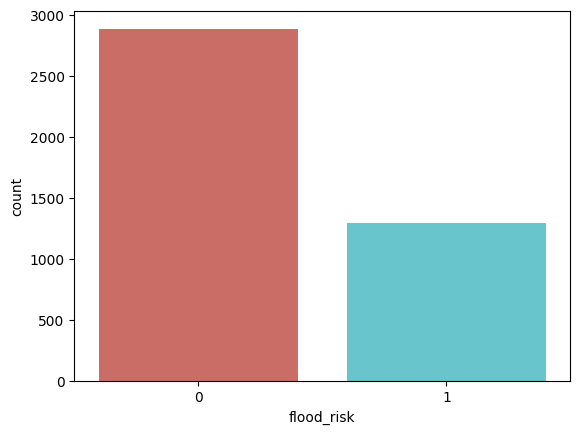

In [4]:
sns.countplot(x = 'flood_risk', data = data, palette='hls')
plt.show()

In [5]:
total = data['flood_risk'].value_counts()[0] + data['flood_risk'].value_counts()[1]
n1 = data['flood_risk'].value_counts()[0]
n2 = data['flood_risk'].value_counts()[1]
r1 = n1/total*100
r2 = n2/total*100

print("Percentage of non flood point: {} %".format(r1))
print("Percentage of flood point: {} %".format(r2))

Percentage of non flood point: 69.08351280210576 %
Percentage of flood point: 30.91648719789423 %


## 4. Data Cleaning

In [6]:
# check for unique values in city and state columns
print(data['city'].unique())
print(data['state'].unique())

['Kuala Lumpur' 'Johor Bahru' 'Muar' 'Puchong' 'Petaling Jaya' 'Klang'
 'Subang Jaya' 'Cheras' 'Butterworth' 'Batu Caves' 'Seri Kembangan' 'Ipoh'
 'Tasek Gelugor' 'Kuching' 'Kajang' 'Kota Kinabalu' 'Kuantan' 'Seremban'
 'Kuala Terengganu' 'Ampang' 'Kapit' 'City:  Taman Peringgit Jaya' 'Miri'
 'Sepang' 'Kulai' 'Padang Lalang' 'Bandar Baru Bangi' 'Png' 'Alor Setar'
 'Sandakan' 'Bukit Mertajam' 'Mlk' 'Melaka' 'Shah Alam' 'Lumut'
 'Sungai Petani' 'Labis' 'Pangkor' 'Kuala Lipis' 'Kluang'
 'Wilayah Persekutuan' 'Port Dickson' 'Beaufort' 'Segamat' 'Kemaman'
 'Cukai' 'Ulu Tiram' 'Kulim' 'Georgetown' 'Skudai' 'Taiping' 'Bentong'
 'City:  Bandar Melaka' 'Limbang' 'Perai' 'Jalan Kuching' 'Bayan Lepas'
 'Kota Bharu' 'Jalan Selat' 'Parit Buntar' 'Medan Mutiara' 'Penang'
 'Selayang Baru' 'Tapah' 'Kuala Kangsar' 'Sibu' 'Sungai Buloh' 'City:  W'
 'Kota Tinggi' 'Temerloh' 'Teluk Intan' 'Lintang Angsana'
 'Jalan Hang Tuah' 'Kubang Semang' 'Jalan Pauh Indah' 'Kepala Batas'
 'Pahang' 'Persiaran Janggus' '

We can see that is the state column, some states are repeated. Also, some regions are being labelled as state. 
We will drop the city column but cleaned up the state column.

In [7]:
# remove the 'City: ' from the city column
# this is due to some error in the data collection process
new1 = [None]*len(data)
for i in range(0, len(data)):
    new1[i] = data['city'][i].replace('City:  ', '')
    
data['city'] = new1
data['city'].unique()

array(['Kuala Lumpur', 'Johor Bahru', 'Muar', 'Puchong', 'Petaling Jaya',
       'Klang', 'Subang Jaya', 'Cheras', 'Butterworth', 'Batu Caves',
       'Seri Kembangan', 'Ipoh', 'Tasek Gelugor', 'Kuching', 'Kajang',
       'Kota Kinabalu', 'Kuantan', 'Seremban', 'Kuala Terengganu',
       'Ampang', 'Kapit', 'Taman Peringgit Jaya', 'Miri', 'Sepang',
       'Kulai', 'Padang Lalang', 'Bandar Baru Bangi', 'Png', 'Alor Setar',
       'Sandakan', 'Bukit Mertajam', 'Mlk', 'Melaka', 'Shah Alam',
       'Lumut', 'Sungai Petani', 'Labis', 'Pangkor', 'Kuala Lipis',
       'Kluang', 'Wilayah Persekutuan', 'Port Dickson', 'Beaufort',
       'Segamat', 'Kemaman', 'Cukai', 'Ulu Tiram', 'Kulim', 'Georgetown',
       'Skudai', 'Taiping', 'Bentong', 'Bandar Melaka', 'Limbang',
       'Perai', 'Jalan Kuching', 'Bayan Lepas', 'Kota Bharu',
       'Jalan Selat', 'Parit Buntar', 'Medan Mutiara', 'Penang',
       'Selayang Baru', 'Tapah', 'Kuala Kangsar', 'Sibu', 'Sungai Buloh',
       'W', 'Kota Tinggi', 'Te

In [8]:
# renaming certain states in the state column
def replaceString(string1, string2, data, length):
    new = [None]*len(data)
    for i in range(0, len(data)):
        new[i] = data['state'][i].replace(string1, string2)
    data['state'] = new
    return data

replaceString("Seberang Perai Utara", "Penang",data, len(data))
replaceString('Bukit Mertajam Penang', 'Penang',data, len(data))
replaceString('Malacca', 'Melaka',data, len(data))
replaceString('Peringgit Jaya', 'Melaka',data, len(data))
replaceString('Wilayah Persekutuan', 'Kuala Lumpur',data, len(data))
replaceString('Persekutuan', 'Kuala Lumpur',data, len(data))
replaceString('Taman Tunku', 'Kuala Lumpur',data, len(data))
replaceString('Taman Selat', 'Penang',data, len(data))
replaceString('Sungai Nibong', 'Penang',data, len(data))
replaceString('Bandar Baru', 'Selangor',data, len(data))
replaceString('Bandar Melaka Malacca', 'Melaka',data, len(data))
replaceString('Bandar Melaka Melaka', 'Melaka',data, len(data))
replaceString('Taman Pauh Indah', 'Penang',data, len(data))
replaceString('Taman Mutiara Penang', 'Penang',data, len(data))
replaceString('Bandar Hilir', 'Melaka',data, len(data))
replaceString('Sungai Bakap', 'Penang',data, len(data))
replaceString('Taiping', 'Perak',data, len(data))
replaceString('Selangor Darul Ehsan', 'Selangor',data, len(data))
replaceString('Berapit', 'Penang',data, len(data))
replaceString('Bukit Mertajam', 'Penang',data, len(data))
replaceString('Pulau Pinang', 'Penang',data, len(data))
replaceString('Malaysia', 'Pahang',data, len(data))
replaceString('Johor Bahru', 'Johor',data, len(data))

print(data['state'].unique())


['Kuala Lumpur' 'Johor' 'Selangor' 'Penang' 'Perak' 'Sarawak' 'Sabah'
 'Pahang' 'Negeri Sembilan' 'Terengganu' 'Melaka' 'Kedah' 'Kelantan'
 'Labuan']


We are now left with only 14 states (no data from the state of Perlis)

## 5. Model Fitting
We will perform a train-test split on our data set. The model used require more than one column of independent variable.
Thus, we apply one hot encoding to the state data. 

In [29]:
# train test split
X = data[['distance','state']]

y = data['flood_risk']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3343, 2), (836, 2), (3343,), (836,))

In [30]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # ori: spare = False

# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [31]:
# one hot encoding will rename column as number, we will rename back to original name
OH_X_train.columns = ['distance', 'Kuala Lumpur', 'Johor', 'Selangor', 'Penang', 'Perak', 'Sarawak', 'Sabah',
 'Pahang', 'Negeri Sembilan', 'Terengganu', 'Melaka', 'Kedah', 'Kelantan',
 'Labuan']

OH_X_train.head()

,distance,Kuala Lumpur,Johor,Selangor,Penang,Perak,Sarawak,Sabah,Pahang,Negeri Sembilan,Terengganu,Melaka,Kedah,Kelantan,Labuan
1515,406.429619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2433,1277.058713,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2558,779.839293,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3617,314.436809,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,573.489954,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
OH_X_valid.columns = ['distance', 'Kuala Lumpur', 'Johor', 'Selangor', 'Penang', 'Perak', 'Sarawak', 'Sabah',
 'Pahang', 'Negeri Sembilan', 'Terengganu', 'Melaka', 'Kedah', 'Kelantan',
 'Labuan']

OH_X_valid.head()

,distance,Kuala Lumpur,Johor,Selangor,Penang,Perak,Sarawak,Sabah,Pahang,Negeri Sembilan,Terengganu,Melaka,Kedah,Kelantan,Labuan
3004,217.281156,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,244.799012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2717,254.861137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3016,36.470273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2432,1271.408095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# get some information about the data that will use for fitting the model
OH_X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 3004 to 3172
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance         836 non-null    float64
 1   Kuala Lumpur     836 non-null    float64
 2   Johor            836 non-null    float64
 3   Selangor         836 non-null    float64
 4   Penang           836 non-null    float64
 5   Perak            836 non-null    float64
 6   Sarawak          836 non-null    float64
 7   Sabah            836 non-null    float64
 8   Pahang           836 non-null    float64
 9   Negeri Sembilan  836 non-null    float64
 10  Terengganu       836 non-null    float64
 11  Melaka           836 non-null    float64
 12  Kedah            836 non-null    float64
 13  Kelantan         836 non-null    float64
 14  Labuan           836 non-null    float64
dtypes: float64(15)
memory usage: 104.5 KB


In [34]:
# model training
# instantiate the model, we will use liblinear since this is only a small dataset and other methods results in convergence issue
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(OH_X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
# get model coefficient and intercept
print("Model coefficient: ", logreg.coef_)
print("Model intercept: ", logreg.intercept_)

Model coefficient:  [[-1.89407693e-02  4.77941620e-01  1.22460645e-01  1.37677540e-03
   1.52185371e+00  5.30927351e-02  9.10748035e-01  5.44494671e-01
   8.31631218e-01  6.50728294e-01  2.67305790e-01  1.99053696e-01
   1.45960340e+00  1.12335137e+00  1.95290287e-02]]
Model intercept:  [8.18317099]


In [36]:
y_pred_test = logreg.predict(OH_X_valid)
y_pred_test

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [37]:
# flood probability
logreg.predict_proba(OH_X_valid)[:,0]

array([3.72278883e-03, 1.75597356e-02, 1.98325348e-02, 1.21648924e-04,
       9.99999617e-01, 9.99389351e-01, 9.98753403e-01, 9.99978554e-01,
       3.88472761e-01, 8.35223885e-01, 9.99944269e-01, 9.44150575e-01,
       9.99975047e-01, 1.00000000e+00, 2.87951607e-01, 6.09726181e-05,
       9.30390281e-01, 9.99983794e-01, 1.00000000e+00, 9.99476828e-01,
       9.99999469e-01, 9.99999876e-01, 2.61964041e-04, 9.98110014e-01,
       7.96130318e-01, 9.22911277e-01, 9.99999754e-01, 8.33391631e-01,
       9.99998179e-01, 1.00000000e+00, 9.98891257e-01, 9.99764585e-01,
       2.87951607e-01, 9.99999999e-01, 9.76201767e-01, 5.96725641e-02,
       2.42439642e-04, 9.99999999e-01, 3.64476839e-02, 1.55054999e-03,
       6.98864993e-04, 9.99962695e-01, 9.99999702e-01, 9.99979491e-01,
       9.93967197e-01, 9.99853685e-01, 2.35184374e-01, 9.99525850e-01,
       9.99999850e-01, 6.86146558e-01, 1.00000000e+00, 6.36616055e-03,
       4.09945730e-03, 9.99838698e-01, 9.99999999e-01, 9.99999988e-01,
      

In [38]:
# no flood probability
logreg.predict_proba(OH_X_valid)[:,1]

array([9.96277211e-001, 9.82440264e-001, 9.80167465e-001, 9.99878351e-001,
       3.83117012e-007, 6.10648880e-004, 1.24659666e-003, 2.14462912e-005,
       6.11527239e-001, 1.64776115e-001, 5.57308230e-005, 5.58494254e-002,
       2.49533683e-005, 1.60525712e-010, 7.12048393e-001, 9.99939027e-001,
       6.96097186e-002, 1.62064509e-005, 3.60587552e-014, 5.23172492e-004,
       5.31290776e-007, 1.23920991e-007, 9.99738036e-001, 1.88998608e-003,
       2.03869682e-001, 7.70887233e-002, 2.46158175e-007, 1.66608369e-001,
       1.82110302e-006, 1.51745653e-016, 1.10874349e-003, 2.35414904e-004,
       7.12048393e-001, 6.58812332e-010, 2.37982330e-002, 9.40327436e-001,
       9.99757560e-001, 6.23739272e-010, 9.63552316e-001, 9.98449450e-001,
       9.99301135e-001, 3.73054554e-005, 2.98329773e-007, 2.05085165e-005,
       6.03280263e-003, 1.46315194e-004, 7.64815626e-001, 4.74150071e-004,
       1.49826057e-007, 3.13853442e-001, 4.36535882e-011, 9.93633839e-001,
       9.95900543e-001, 1

## 6. Model Evaluation

In [39]:
# model accuracy checking
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, y_pred_test)))

Model accuracy score: 0.9880


In [40]:
# compare train and test set accuracy
y_pred_train = logreg.predict(OH_X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9928


In [41]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(OH_X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(OH_X_valid, y_valid)))

Training set score: 0.9928
Test set score: 0.9880


The training set and test set score are quite comparable so no question of overfitting. 

### Notes for interpretation:
1. Training score: How the model fit in the training data. If model fits so well in a data with lots of variance -> overfitting. This will result in poor test score. The mode curved a lot to fit the training data and generalized very poorly
2. Test score: Real life scenario. Higher the better.
3. High training score and low test score is over-fitting, both low is under-fitting. 
    - Technical term: Low bias and high variance is over-fitting and high variance and high bias is under-fitting
    - Under-fit model will have high training and high testing error; over-fit model will have very low training error but high testing error

References
- https://datascience.stackexchange.com/questions/70054/interpretation-for-test-score-training-score-and-validation-score-in-machine-l

In [42]:
# check class distribution in test set
y_valid.value_counts()

flood_risk
0    577
1    259
Name: count, dtype: int64

In [95]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_valid, y_pred_test)
cm

array([[575,   2],
       [  8, 251]], dtype=int64)

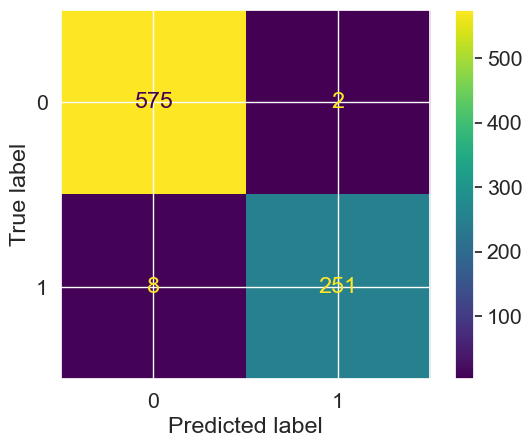

In [98]:
# visualize confusion matrix with seaborn heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [45]:
tp = 251 # true positive
tn = 575 # true negative
fn = 8 # false negative
fp = 2 # false positive

accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)

classification_error = (fp + fn) / float(tp + tn + fp + fn)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = tp / float(tp + fp)
print('Precision : {0:0.4f}'.format(precision))

recall = tp / float(tp + fn)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Accuracy:  0.9880382775119617
Classification error : 0.0120
Precision : 0.9921
Recall or Sensitivity : 0.9691


- Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

- Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       577
           1       0.99      0.97      0.98       259

    accuracy                           0.99       836
   macro avg       0.99      0.98      0.99       836
weighted avg       0.99      0.99      0.99       836



- `f1-score` is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. `f1-score` is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

- Support is the actual number of occurrences of the class in our dataset.

## 7. Adjusting threshold level

In [48]:
# print first 10 predicted probabilities of 0 and 1 (two classes)
y_pred_prob = logreg.predict_proba(OH_X_valid)[0:10]
y_pred_prob

array([[3.72278883e-03, 9.96277211e-01],
       [1.75597356e-02, 9.82440264e-01],
       [1.98325348e-02, 9.80167465e-01],
       [1.21648924e-04, 9.99878351e-01],
       [9.99999617e-01, 3.83117012e-07],
       [9.99389351e-01, 6.10648880e-04],
       [9.98753403e-01, 1.24659666e-03],
       [9.99978554e-01, 2.14462912e-05],
       [3.88472761e-01, 6.11527239e-01],
       [8.35223885e-01, 1.64776115e-01]])

In [49]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Flood', 'Prob of - Flood'])

y_pred_prob_df

,Prob of - No Flood,Prob of - Flood
0,0.003723,9.962772e-01
1,0.017560,9.824403e-01
2,0.019833,9.801675e-01
3,0.000122,9.998784e-01
4,1.000000,3.831170e-07
5,0.999389,6.106489e-04
6,0.998753,1.246597e-03
7,0.999979,2.144629e-05
8,0.388473,6.115272e-01
9,0.835224,1.647761e-01


In [54]:
y_pred1 = logreg.predict_proba(OH_X_valid)[:, 1] # store probabilities of class 1

logreg.predict_proba(OH_X_valid)[0:10, 1]

array([9.96277211e-01, 9.82440264e-01, 9.80167465e-01, 9.99878351e-01,
       3.83117012e-07, 6.10648880e-04, 1.24659666e-03, 2.14462912e-05,
       6.11527239e-01, 1.64776115e-01])

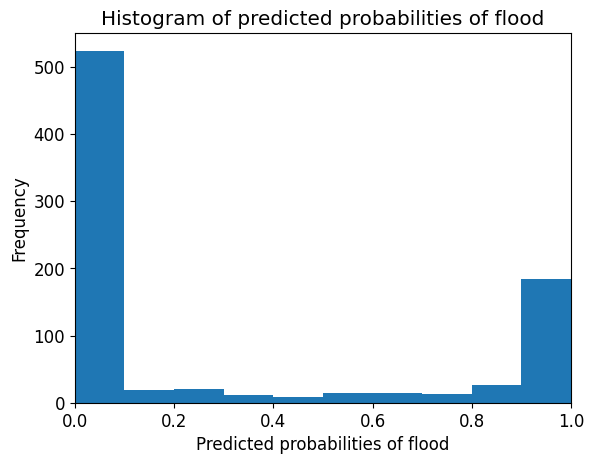

In [62]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of flood')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of flood')
plt.ylabel('Frequency')

plt.savefig('images/histogram_pred_prob.png')

- The histogram skewed to the right and majority of the observations predict no flood risk. 

In [111]:
# adjusting threshold for classification
tn = [None]*5
fp = [None]*5
fn = [None]*5
tp = [None]*5
acc_score = [None]*5
specificity = [None]*5
sensitivity = [None]*5

for i in range(0,5):
    test1 = (logreg.predict_proba(OH_X_valid)[:,1] >= (i+1)/10).astype(int)
    cm1 = confusion_matrix(y_valid, test1)
    tn[i] = cm1[0][0]
    fp[i] = cm1[0][1]
    fn[i] = cm1[1][0]
    tp[i] = cm1[1][1]
    acc_score[i] = accuracy_score(y_valid, test1)
    specificity[i] = tn[i] / (tn[i] + fp[i]) # tell the true negative rate
    sensitivity[i] = tp[i] / float(tp[i] + fn[i])
    
data_temp = pd.DataFrame(
    {'threshold': [0.1, 0.2, 0.3, 0.4, 0.5],
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp,
        'accuracy': acc_score,
        'specificity': specificity,
        'sensitivity': sensitivity
    })

data_temp
    
 

,threshold,tn,fp,fn,tp,accuracy,specificity,sensitivity
0,0.1,524,53,0,259,0.936603,0.908146,1.000000
1,0.2,543,34,0,259,0.959330,0.941075,1.000000
2,0.3,564,13,0,259,0.984450,0.977470,1.000000
3,0.4,572,5,3,256,0.990431,0.991334,0.988417
4,0.5,575,2,8,251,0.988038,0.996534,0.969112


- The default threshold is 0.5 and by adjusting it, the sensitivity and specificity will change
- Sensitivity and specificity have an inverse relationship
- From the table, we can see increasing threshold increase the accuracy, but accuracy decreases slightly from 0.4 to 0.5

## 8. ROC - AUC
1. Stands for receiver operating characteristic curve. It shows the performance of classification model at various classification threshold levels. 

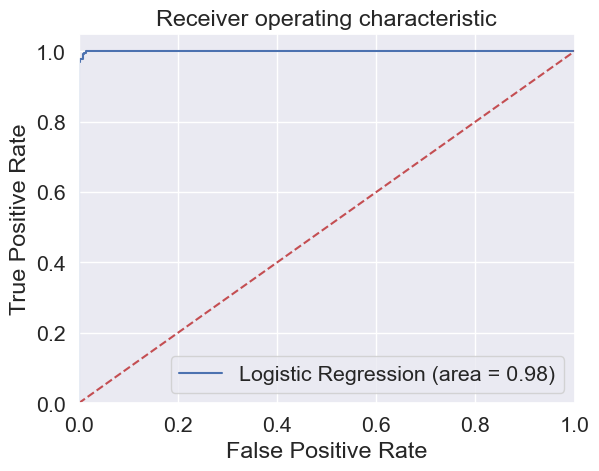

<Figure size 640x480 with 0 Axes>

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_valid, logreg.predict(OH_X_valid))
fpr, tpr, thresholds = roc_curve(y_valid, logreg.predict_proba(OH_X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

plt.savefig('images/Log_ROC.png')

In [157]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9997
